In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtsrb-german-traffic-sign/Meta.csv
/kaggle/input/gtsrb-german-traffic-sign/Train.csv
/kaggle/input/gtsrb-german-traffic-sign/Test.csv
/kaggle/input/gtsrb-german-traffic-sign/Meta/37.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/35.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/11.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/31.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/4.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/40.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/33.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/9.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/.~lock.ClassesInformation.ods#
/kaggle/input/gtsrb-german-traffic-sign/Meta/14.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/1.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/39.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/20.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/38.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/2.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/10.png


In [2]:
import os
import cv2

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

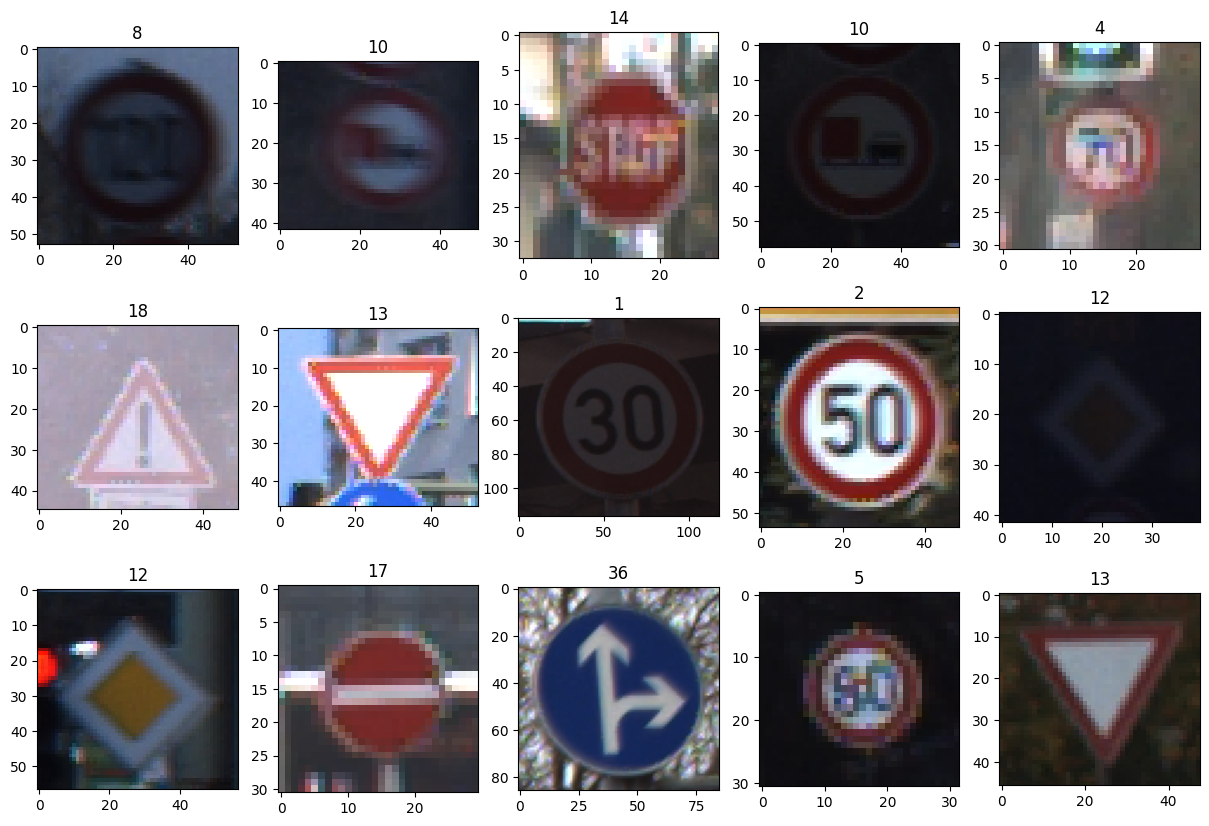

In [6]:
# Load the training labels
root = '/kaggle/input/gtsrb-german-traffic-sign/' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = data.shape[0]

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

Text(0.5, 1.0, 'Classes')

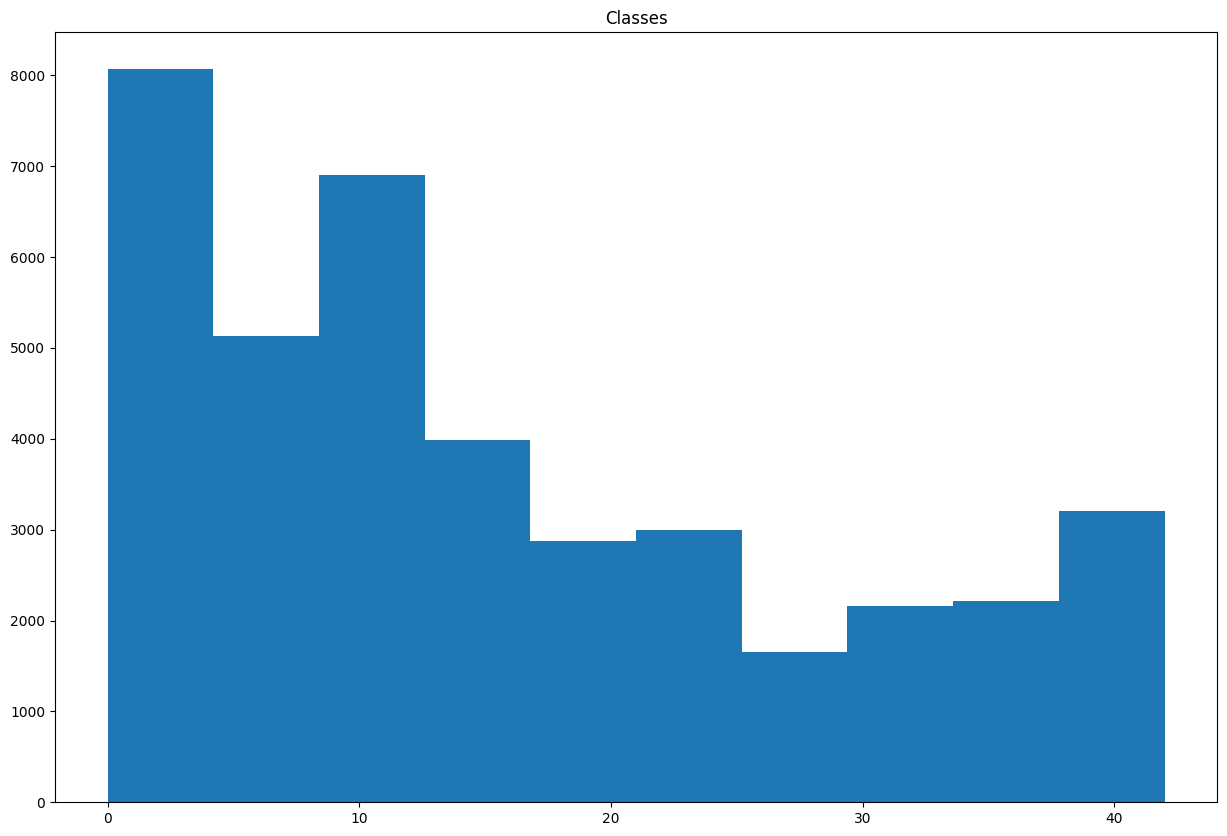

In [7]:
ids = data.ClassId
plt.hist(ids)
plt.title("Classes")

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

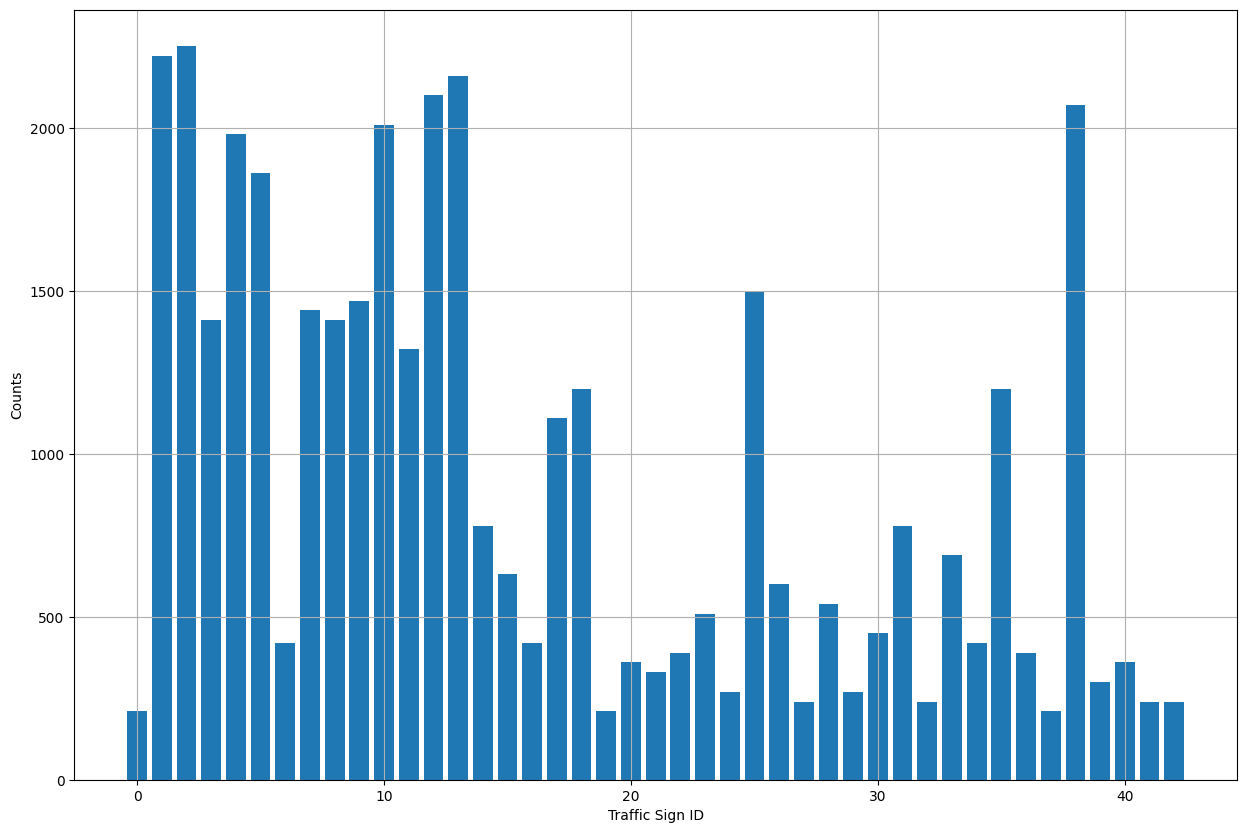

In [8]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

In [11]:
df1 = pd.read_csv("/kaggle/input/gtsrb-german-traffic-sign/Train.csv")
df2 = pd.read_csv("/kaggle/input/gtsrb-german-traffic-sign/Test.csv")
df = pd.concat([df1, df2])
df.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png

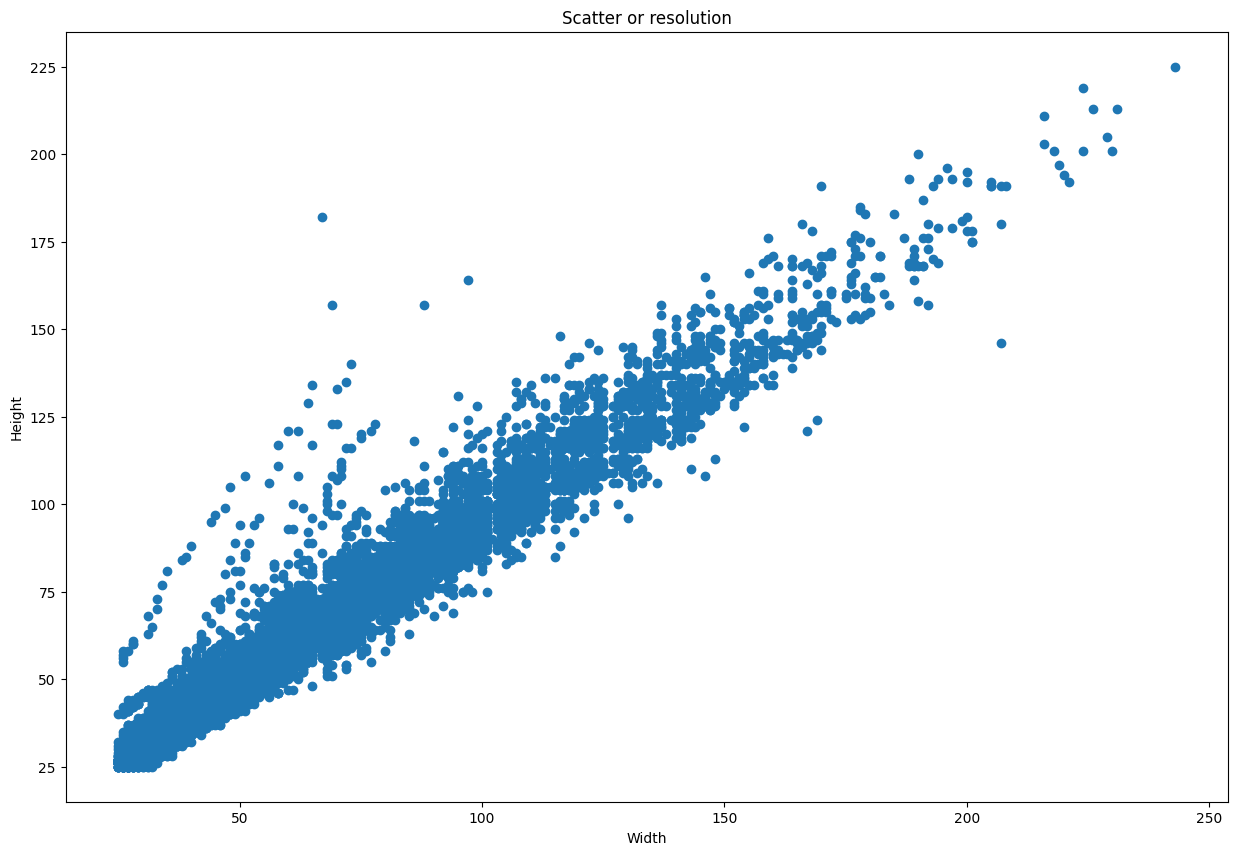

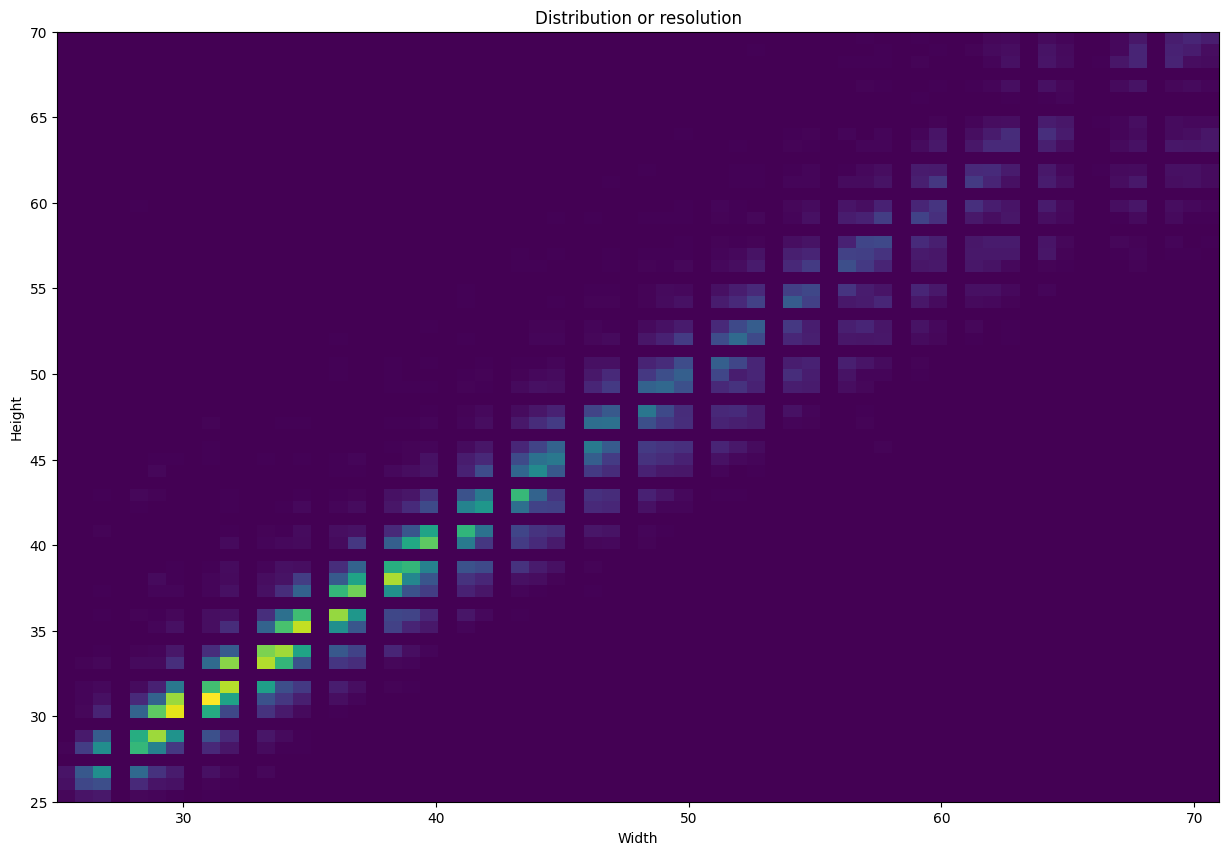

In [24]:
plt.scatter(df.Width, df.Height)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Scatter or resolution")
plt.show()

plt.hist2d(df.Width, df.Height, bins=64, range=[[np.min(df.Width), np.quantile(df.Width, 0.85)], [np.min(df.Height), np.quantile(df.Height, 0.85)]])
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Distribution or resolution")
plt.show()

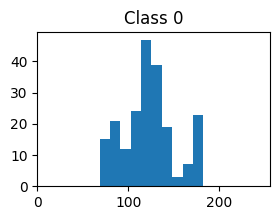

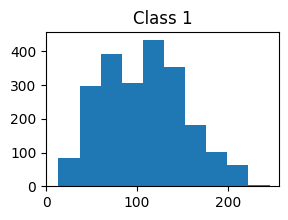

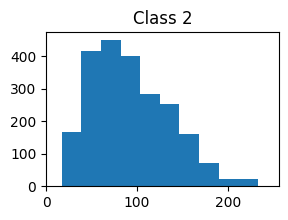

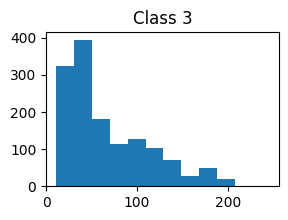

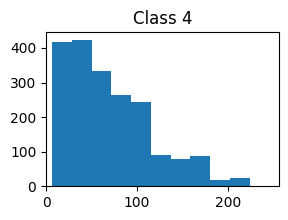

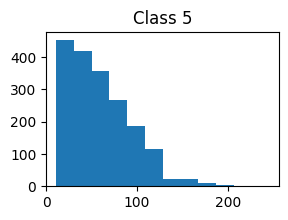

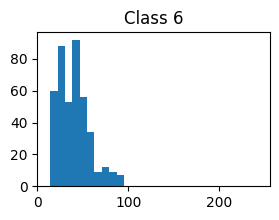

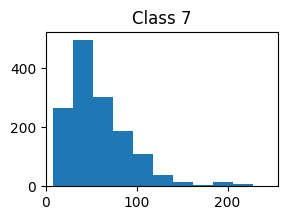

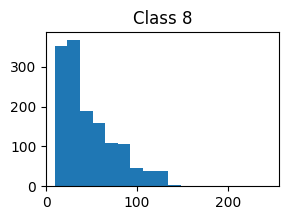

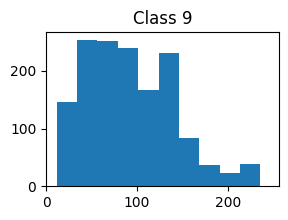

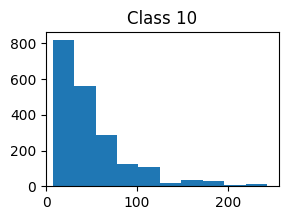

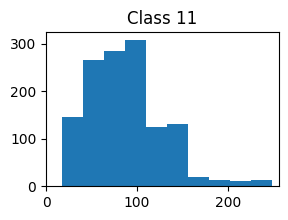

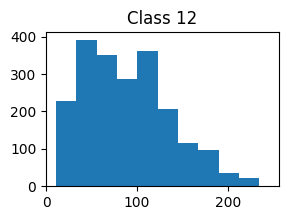

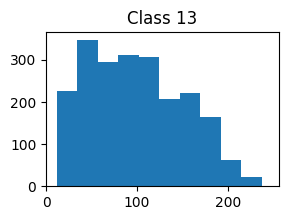

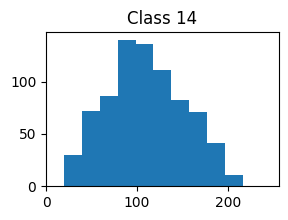

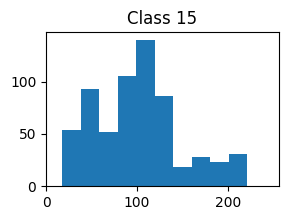

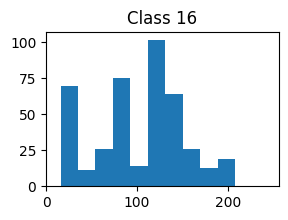

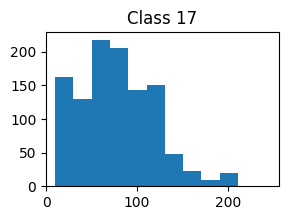

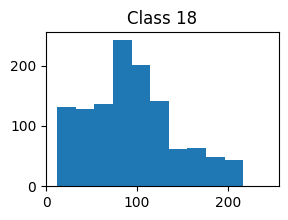

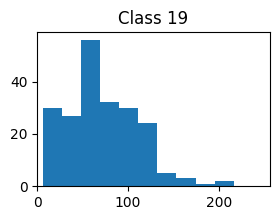

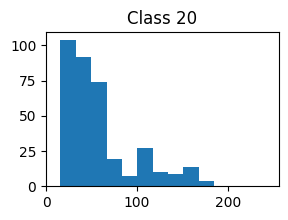

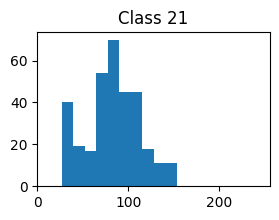

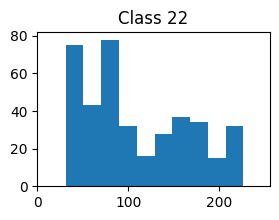

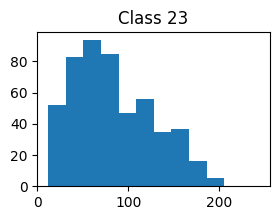

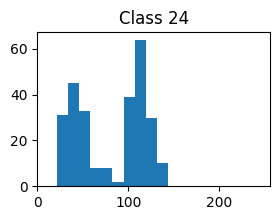

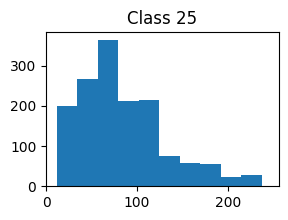

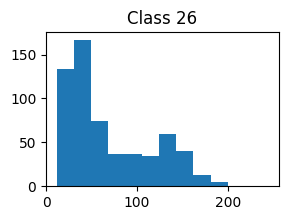

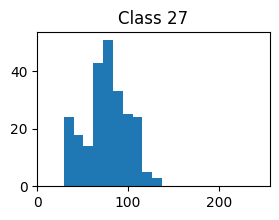

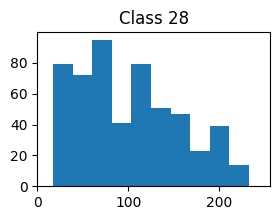

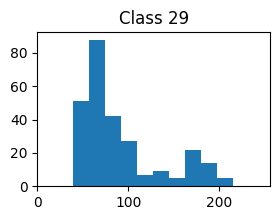

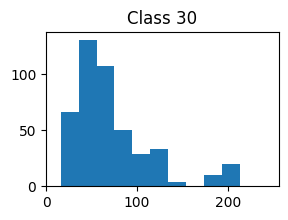

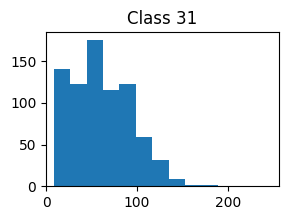

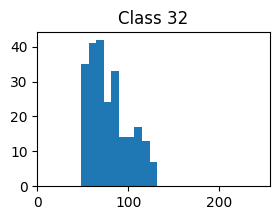

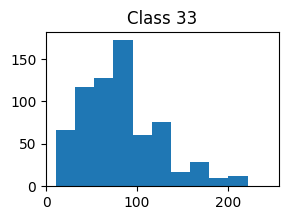

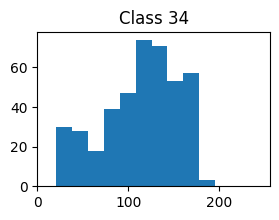

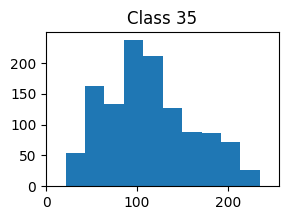

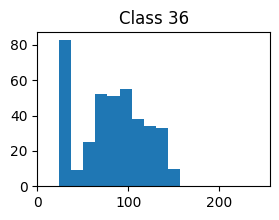

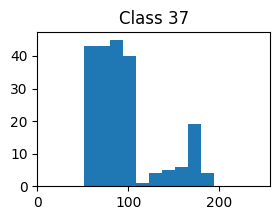

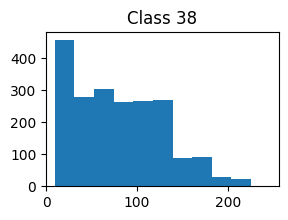

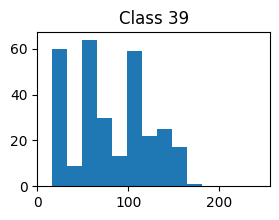

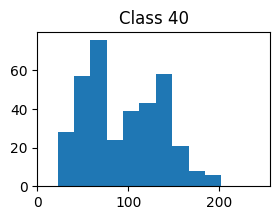

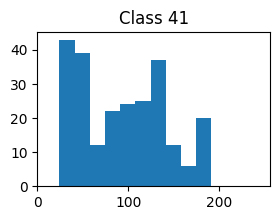

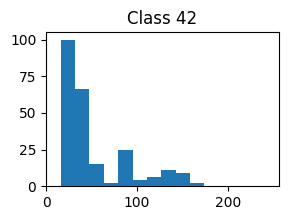

In [47]:
df1 = pd.read_csv("/kaggle/input/gtsrb-german-traffic-sign/Train.csv")

brigtnesses = [[] for i in range(int(np.max(df1.ClassId)) + 1)]
for i, row, in df1.iterrows():
    file = row.Path
    img = cv2.imread(os.path.join("/kaggle/input/gtsrb-german-traffic-sign", file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    brigtnesses[row.ClassId].append(np.mean(img))
    
plt.rcParams['figure.figsize'] = [3, 2]
for i in range(int(np.max(df1.ClassId)) + 1):
    plt.hist(brigtnesses[i])
    plt.xlim(0, 256)
    plt.title(f"Class {i}")
    plt.show()